<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

*CSPB 4830 - Yoshie Bell-Souder*

   ## <font color='#0c5fac'>How does quality relate to different chemical information about red wine</font>

## <font color='#6494BD'>1. Introduction</font>

Wine is an intense and mysterious liquor, isn't it? Made from the same grapes, brewed, and made into wine. Wine prices vary from 5 dollars per bottle to over 10 thousand dollars per bottle.
In addition, it is produced worldwide, and the taste varies depending on the place of production.
So today I will research in this project through regression the problem of distinct differences between wines.

## <font color='#6494BD'>2. Data collection</font>

The dataset came from Portugal's red wine various information in 2009. The data originally comes from: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

There are 11 features and one output variable. The dataset does not contain winemaker/brand name, selling prices, or grape types.  Mainly there are the chemical scores and sensory variables.  

<b>Datasize:</b> 26 kb, 1599 samples, 11 wine features and 1 output: wine quality score.
Wines are described in 3 categories "taste", "aroma," and "appearance" and one separate feature for alcohol content.

<b>"Taste"</b><br>
1. fixed acidity: how much acid is contained. Less acid means less evaporation<br>
2. volatile acidity: how much volatile acid is contained. More acid means not delicious vinegar taste<br>
3. citric acid: how much citric acid is contained. Less citric acid means fresh and tasty<br>
4. residual sugar: after fermentation how much remaining sugar. Less sugar is rare and tendency to be expensive<br>
5. chlorides: after fermentation how much remaining salt. Less salt is rare and tendency to be expensive<br>

<b>"Aroma,"</b><br>
6. free sulfur dioxide: Less free sulfur dioxide may prevent microbial growth and the oxidation of wine<br>
7. total sulfur dioxide: Over 50 ppm, the nose and taste of wine become evident<br>
8. density: Water density depends on sugar and alcohol content<br>

<b>"Appearance"</b><br>
9. pH: Measures how much acidic scale from 0 to 14. Most wines are between a 3 - 4 pH scale<br>
10. sulfates: Less sulfates may mean antimicrobial and antioxidant in wine<br>

11. alcohol: How strong the alcohol content is<br>

<b>"Output"</b><br>
quality: the total valuable scale of 1 to 10. However, in this dataset, the score scale was 3 to 8, and the mean value was 5-6.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
red_wine_original = pd.read_csv('winequality-red.csv')

## <font color='#6494BD'>3. Data processing, cleanup and EDA</font>

<b>The data had no NaN values. I did not have to impute or interpolate any values, because the dataset was already very clean. The only I did was to round some variables, for example, the chlorides variable have 11 decimal places, I rounded up to 3. Also, I checked the data types were compatible.</b>

In [2]:
pd.DataFrame({'Missing Values': red_wine_original.isna().sum()})

,Missing Values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<b>Here is an example of the 2009 wine quality dataset:</b>

In [3]:
red_wine_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_wine_original.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


To do the EDA, we will examine whether the distribution is normal and check the number of outliers. A histogram is a nice graph to see how each feature is distributed. If we found extremely un-normalized data, we may need to consider eliminating or adjusting it.

Text(0.5, 0, 'alcohol')

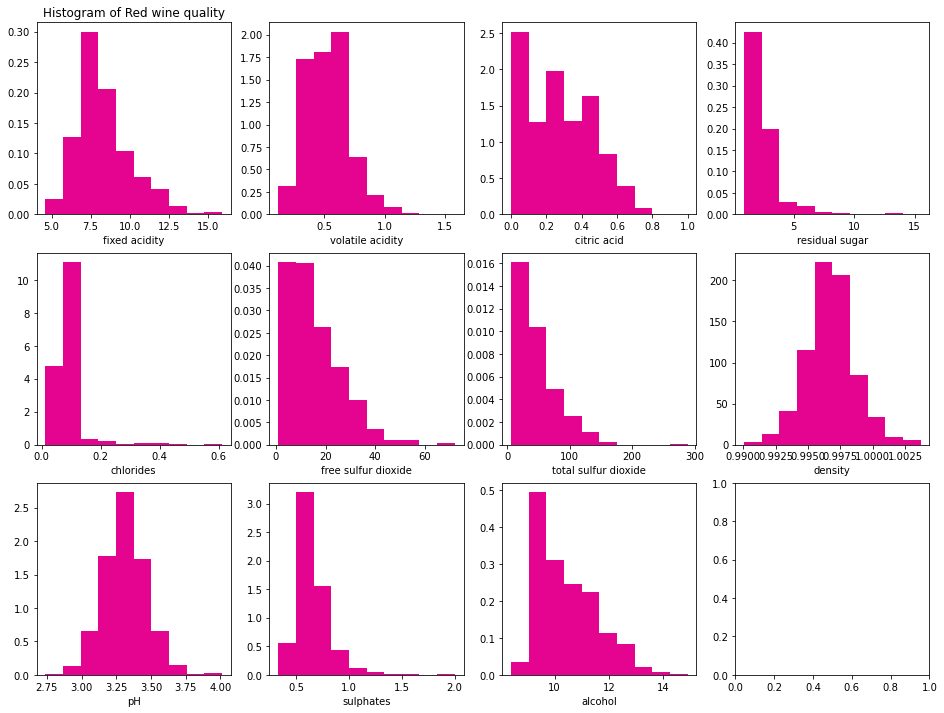

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, sharey=False, figsize=(16,12))

# matplotlib histogram
axes[0,0].hist(red_wine_original['fixed acidity'], density=True, bins = 10, facecolor='#e4048f')
axes[0,1].hist(red_wine_original['volatile acidity'], density=True, bins = 10, facecolor='#e4048f')
axes[0,2].hist(red_wine_original['citric acid'], density=True, bins = 10, facecolor='#e4048f')
axes[0,3].hist(red_wine_original['residual sugar'], density=True, bins = 10, facecolor='#e4048f')
axes[1,0].hist(red_wine_original['chlorides'], density=True, bins = 10, facecolor='#e4048f')
axes[1,1].hist(red_wine_original['free sulfur dioxide'], density=True, bins = 10, facecolor='#e4048f')
axes[1,2].hist(red_wine_original['total sulfur dioxide'], density=True, bins = 10, facecolor='#e4048f')
axes[1,3].hist(red_wine_original['density'], density=True, bins = 10, facecolor='#e4048f')
axes[2,0].hist(red_wine_original['pH'], density=True, bins = 10, facecolor='#e4048f')
axes[2,1].hist(red_wine_original['sulphates'], density=True, bins = 10, facecolor='#e4048f')
axes[2,2].hist(red_wine_original['alcohol'], density=True, bins = 10, facecolor='#e4048f')

# Add labels
axes[0,0].set_title('Histogram of Red wine quality')
axes[0,0].set_xlabel('fixed acidity')
axes[0,1].set_xlabel('volatile acidity')
axes[0,2].set_xlabel('citric acid')
axes[0,3].set_xlabel('residual sugar')
axes[1,0].set_xlabel('chlorides')
axes[1,1].set_xlabel('free sulfur dioxide')
axes[1,2].set_xlabel('total sulfur dioxide')
axes[1,3].set_xlabel('density')
axes[2,0].set_xlabel('pH')
axes[2,1].set_xlabel('sulphates')
axes[2,2].set_xlabel('alcohol')

<b>To do the EDA, we will examine the correlation plot. We want to simplify decision making by eliminate highly correlated variables</b>

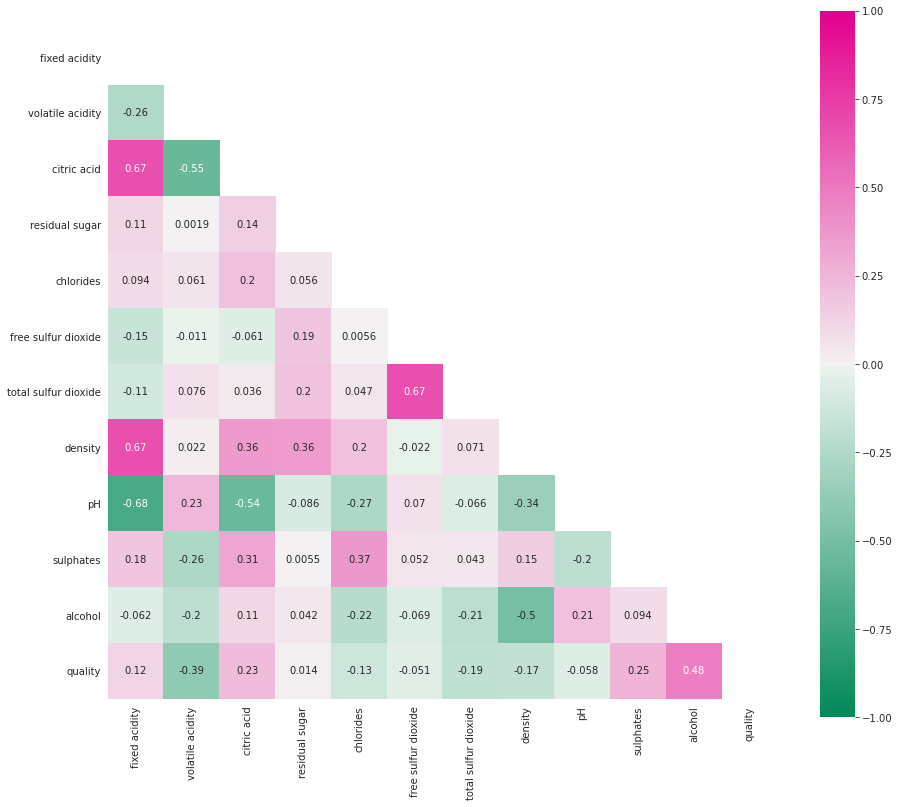

In [7]:
corrMatrix = red_wine_original.corr()

corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,13))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=1, vmin=-1,annot=True, center=0, 
                     square=True, cmap=sns.diverging_palette(145, 345, s=100, as_cmap=True), annot_kws={"fontsize":10})

In [8]:
red_wine_original.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<b>I will eliminate 'free sulfur dioxide', 'total sulfur dioxide', 'pH', and 'alcohol' as they have a low correlation. </b>

In [9]:
red_wine = red_wine_original.drop(columns=['total sulfur dioxide', 'free sulfur dioxide', 'pH', 'alcohol'])

## <font color='#6494BD'>4. Model building</font>

<b>First, I will prepare both the training and the test dataset. I will take 20% as test data, and the rest of the sample data goes to training data. Then I will check accuracy rate with 8 models we studied in this class: Logistic Regression, K Nearest Neighbor, Decision Tree, AdaBoost, Gradient Boosting, Random Forest, Bagging, and  Support Vector Machines.</b>

In [10]:
# Create arrays for the features and the response variable
# store for use later 
y = red_wine['quality'].values
X = red_wine.drop('quality', axis=1).values
         
# # Convert the labels to numeric labels
# y = np.array(pd.to_numeric(y))
        
# create training and validation sets 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### <font color='#6494BD'>Logistic Regression</font>

In [11]:
lr = LogisticRegression().fit(x_train, y_train)
Lr_pred = lr.predict(x_test)
lr_acc = lr.score(x_test, y_test)

print("Train data accuracy: ", np.round(lr.score(x_train, y_train),4))
print("Test data accuracy:",  np.round(lr_acc, 4))
# print('Test prediction:', LR_pred)

Train data accuracy:  0.5317
Test data accuracy: 0.4938


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <font color='#6494BD'>K-nearest neighbors</font>

In [12]:
knn = KNeighborsClassifier().fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = knn.score(x_test, y_test)

print("The training accuracy:", np.round(knn.score(x_train, y_train),4))
print("The testing accuracy:", np.round(knn_acc, 4))

The training accuracy: 0.663
The testing accuracy: 0.4781


### <font color='#6494BD'>Decision Tree</font>

In [13]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
dtc_acc = dtc.score(x_test, y_test)

print("The train accuracy:", np.round(dtc.score(x_train, y_train),4))
print("The test accuracy:", np.round(dtc_acc, 4))

The train accuracy: 1.0
The test accuracy: 0.6188


### <font color='#6494BD'>adaBoost</font>

In [14]:
abc = AdaBoostClassifier().fit(x_train, y_train)
abc_pred = abc.predict(x_test)
abc_acc = abc.score(x_test, y_test)

print("The training accuracy:", np.round(abc.score(x_train, y_train),4))
print("The testing accuracy:", np.round(abc_acc, 4))

The training accuracy: 0.3081
The testing accuracy: 0.2844


### <font color='#6494BD'>Gradient Boosting Classifier</font>

In [15]:
gbc = GradientBoostingClassifier().fit(x_train, y_train)
gbc_acc = gbc.score(x_test, y_test)

print("The train accuracy:", np.round(gbc.score(x_train, y_train),4))
print("The test accuracy:", np.round(gbc_acc, 4))

The train accuracy: 0.8616
The test accuracy: 0.6062


### <font color='#6494BD'>Bagging Classifier</font>

In [16]:
bc = BaggingClassifier().fit(x_train, y_train)
bc_acc = np.round(bc.score(x_test, y_test), 4)

print("The train accuracy:", np.round(bc.score(x_train, y_train),4))
print("The test accuracy:", bc_acc)

The train accuracy: 0.9851
The test accuracy: 0.6531


### <font color='#6494BD'>Random Forest</font>

In [17]:
rfc = RandomForestClassifier().fit(x_train, y_train)
rfc_fit = rfc.fit(x_train, y_train)
rfc_acc = np.round(rfc_fit.score(x_test, y_test), 4)

print("The train accuracy:", np.round(rfc_fit.score(x_train, y_train),4))
print("The test accuracy:", rfc_acc)

The train accuracy: 1.0
The test accuracy: 0.6875


### <font color='#6494BD'>Support Vector Machines</font>

In [18]:
svm = SVC().fit(x_train, y_train)
svm_acc = np.round(svm.score(x_test, y_test), 4)

print("The train accuracy:", np.round(svm.score(x_train, y_train),4))
print("The test accuracy:", svm_acc)

The train accuracy: 0.466
The test accuracy: 0.4562


### <font color='#6494BD'>Comparison accuracy scores by model</font>

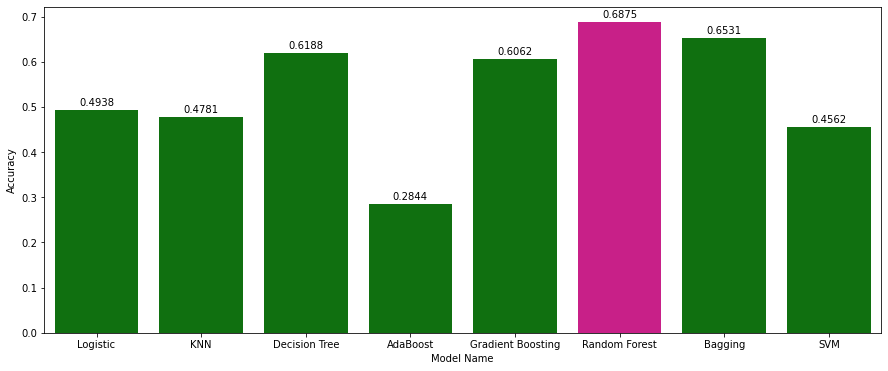

In [19]:
models = {'Logistic': lr_acc, 'KNN': knn_acc, 'Decision Tree': dtc_acc, 'adaBoost': abc_acc, 'Gradient Boosting': gbc_acc,
          'Random Forest': rfc_acc, 'Bagging': bc_acc, 'SVM': svm_acc, }
# print(models)

models_df = pd.DataFrame(pd.Series(models))
models_df.columns = ['Scores']
models_df['Name'] = ['Logistic', 'KNN', 'Decision Tree', 'AdaBoost', 'Gradient Boosting',
                      'Random Forest', 'Bagging', 'SVM', ]
idx = np.array(list('1234567')) 

plt.figure(figsize=[15, 6])
clrs = [ '#e4048f' if (x == max('Scores')) else 'green' for x in 'Scores' ]
axis = sns.barplot(x = 'Name', y = 'Scores', palette=clrs, data = models_df) # color=clrs)
axis.set(xlabel='Model Name', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center")
    

### Random Forest

After compared with 8 models, The Random Forest model looks like the best model, because accuracy rate is highest. To predict the quality score, there are many considering features. Therefore the Random Forest makes sense to be the best model to me. 

## <font color='#6494BD'>5. Model training</font>

### Build Random Forest parameter tuning
Let's check best parameters.

In [31]:
# # of tress
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# # of features
max_features = ['auto', 'sqrt']
# max # of levels in tree
max_depth = [2, 4]
# minumum # of samples required to split a node
min_samples_split = [2, 5]
# minimum # of samples required at each leaf node
min_samples_leaf = [1, 2]
bootstrap = [True, False]

# create the random grid
param_grid = { 'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth,
            'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap }
print(param_grid)

rf_grid = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=40, n_jobs = -1)
rf_grid.fit(x_train, y_train)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=40, verbose=2)

In [32]:
print ('Random grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_grid.best_params_, ' \n')

Random grid:  {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}  



<b>I will use the best parameters that machine found.</b>

In [33]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 5, min_samples_leaf= 2, max_features = 'sqrt', 
                               max_depth= 4, bootstrap=False) 
randmf = randmf.fit( x_train, y_train)
y_pred_randmf = pd.DataFrame( { "actual": y_test, 
"predicted_prob": randmf.predict( ( x_test ) ) } ) 
y_pred_randmf

,actual,predicted_prob
0,7,5.945123
1,5,6.060584
2,6,5.392052
3,7,6.165109
4,6,5.574342
...,...,...
315,6,5.791318
316,5,5.392059
317,5,5.434641
318,7,6.089388


### overfitting

<b>Let's check n_estimators</b>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were 

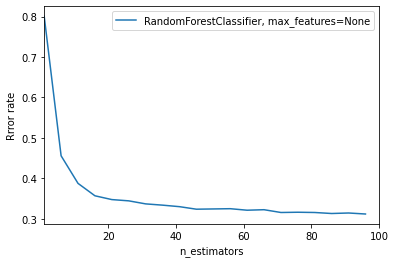

In [34]:
from collections import OrderedDict
from sklearn.datasets import make_classification

# NOTE: Setting the 'warm_start':True mean disables
# support for parallelized ensembles but is necessary for tracking the OOB
ensemble_clfs = [
#     (
#         "RandomForestClassifier, max_features='sqrt'",
#         RandomForestClassifier(
#             warm_start=True,
#             oob_score=True,
#             max_features="sqrt",
#             random_state=40,
#         ),
#     ),
#     (
#         "RandomForestClassifier, max_features='log2'",
#         RandomForestClassifier(
#             warm_start=True,
#             max_features="log2",
#             oob_score=True,
#             random_state=40,
#         ),
#     ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=40,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Rrror rate")
plt.legend(loc="upper right")
plt.show()

<b>The best was n_estimators = 50, As you see in the graph above, the graph will be steady after 70.</b>

In [45]:
adjust_rfc = RandomForestRegressor(n_estimators = 70, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', 
                               max_depth= 4, bootstrap=True)
adjust_rfc = RandomForestClassifier()
adjust_rfc = adjust_rfc.fit(x_train, y_train)
pred_adjust_rfc = adjust_rfc.predict(x_test)
adjust_rfc_acc = np.round(adjust_rfc.score(x_test, y_test), 4)
print("The test accuracy before tuning:", rfc_acc)
print("The test accuracy after tuning:", adjust_rfc_acc)

The test accuracy before tuning: 0.6875
The test accuracy after tuning: 0.6906


It was slightly better

<b>Next, I would like to examine which feature(s) is important</b>

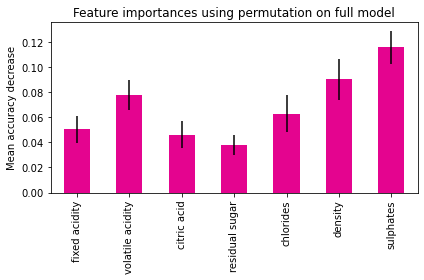

In [46]:
from sklearn.inspection import permutation_importance

feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density',
                 'sulphates']
result = permutation_importance(
    adjust_rfc, x_test, y_test, n_repeats=10, random_state=40, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, color='#e4048f')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

<b>After observation of this, volatile acidity, density, and sulfates were found important.</b>

<b>At the same time, fixed acidity, citric acid and residual sugar are relatively small, and may not be important. Let's compared these with the features we are going to remove these three.<b>

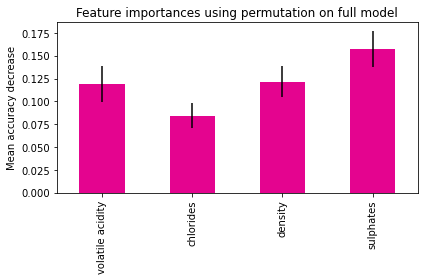

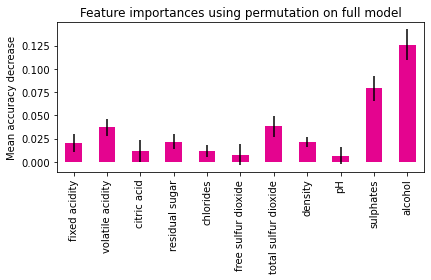

The test accuracy before get started: 0.7188
The test accuracy before tuning: 0.6875
The test accuracy after tuning: 0.6906
The test accuracy after removing less important features: 0.6781


In [47]:
# REMOVING 3 FEATURES
YY = red_wine['quality'].values
XX = red_wine.drop(['fixed acidity','citric acid','residual sugar',
                 'quality'], axis=1).values

# create training and validation sets 
x_train, x_test, y_train, y_test = train_test_split(XX, YY, test_size=0.2, random_state=40)
important_rfc = RandomForestClassifier(n_estimators=90)
important_rfc = important_rfc.fit(x_train, y_train)
important_rfc_acc = np.round(important_rfc.score(x_test, y_test), 4)
feature_names = ['volatile acidity','chlorides','density','sulphates']
result = permutation_importance(
    important_rfc, x_test, y_test, n_repeats=10, random_state=40, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, color='#e4048f')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


# ORIGINAL FEATURES
YYY = red_wine_original['quality'].values
XXX = red_wine_original.drop(['quality'], axis=1).values

# create training and validation sets 
x_train, x_test, y_train, y_test = train_test_split(XXX, YYY, test_size=0.2, random_state=40)
original_rfc = RandomForestClassifier(n_estimators=90)
original_rfc = adjust_rfc.fit(x_train, y_train)
original_rfc_acc = np.round(original_rfc.score(x_test, y_test), 4)



feature_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                 'total sulfur dioxide','density','pH','sulphates','alcohol']
result = permutation_importance(
    original_rfc, x_test, y_test, n_repeats=10, random_state=40, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, color='#e4048f')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


print("The test accuracy before get started:", original_rfc_acc)
print("The test accuracy before tuning:", rfc_acc)
print("The test accuracy after tuning:", adjust_rfc_acc)
print("The test accuracy after removing less important features:", important_rfc_acc)

## <font color='#6494BD'>6. Results and Analysis:</font>

After model methods comparison, The Random Forest Classifier looks like the best model. It was a bit hard to tune hyperparameters and consider features.  After exploring data, removing and/or adding features, the accuracy results were not improved as much as I expected. Although I wanted to have higher accuracy, about the 70% result after tuning was acceptable.  

## Result

- The test accuracy with original data 11 features: 0.7188
- The test accuracy with 8 features( 'free sulfur dioxide', and "total sulfur dioxide" 'pH', and 'alcohol' as they have a low correlation): 0.6875
- The test accuracy after tuning hyperparameters with 8 models: 0.6906
- The test accuracy after removing less important features( total 5 features): 0.6781


## Analysis
- As you may see the original features are the best prediction accuracy. However, when you look at the important features graph above, the alcohol and the sulfates were important features. Wine is a hard drink, truly important, however, wine quality was handled from three angles, which are taste, aroma, and appearance. It is important to consider other features as well.  
- Considering and removing correlation is also important in the data processing.  Because we can eliminate nicely balanced three-angle features, and in addition, to tuning the data, we can improve the result.
- Because the dataset is already cleanup and not too many features, I have learned the 8 features are the best fit, not too much, and not too less.

## <font color='#6494BD'>7. Discussion and Conclusion:</font> 

## Conclusion
- The Random Forest classifer was nice model which we can examine results highly for this dataset.  
- Timing to decide which features are important otherwise the results were changed. In this case, it was worse.

## Discussion
- When I explored which ways to tune parameters, check to over or under fit the data. It may be better ways to do it more, like cross validation, ROC.  I was not able to lead good conclusion. so in the end, I adjusted hyperparameters of Random Forest Classifier.

## Reference

- https://www.geeksforgeeks.org/hyperparameters-of-random-forest-classifier/
- https://www.winemag.com/2015/08/25/how-to-taste-wine/